In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [396]:
Train_data=pd.read_excel("Fees_Train.xlsx")
Test_data=pd.read_excel("Fees_Test.xlsx")

In [397]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [398]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [399]:
Train_data.shape

(5961, 7)

In [400]:
Test_data.shape

(1987, 6)

In [401]:
Train_data.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

# Train Data

In [402]:
Train_data.shape

(5961, 7)

In [403]:
Train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [404]:
Train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

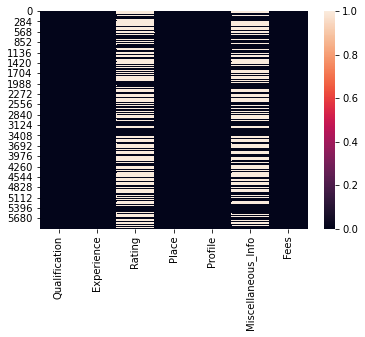

In [405]:
sns.heatmap(Train_data.isnull())

In [406]:
Train_data['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [407]:
Train_data["Miscellaneous_Info"].fillna(Train_data["Miscellaneous_Info"].mode()[0], inplace=True)

In [408]:
Train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info       0
Fees                     0
dtype: int64

In [409]:
Train_data['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [410]:
Train_data["Rating"].fillna(Train_data["Rating"].mode()[0], inplace=True)

In [411]:
Train_data.isnull().sum()

Qualification          0
Experience             0
Rating                 0
Place                 25
Profile                0
Miscellaneous_Info     0
Fees                   0
dtype: int64

In [412]:
Train_data["Place"].fillna(Train_data["Place"].mode()[0],inplace=True)

In [413]:
Train_data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [414]:
Train_data.isnull().values.any()

False

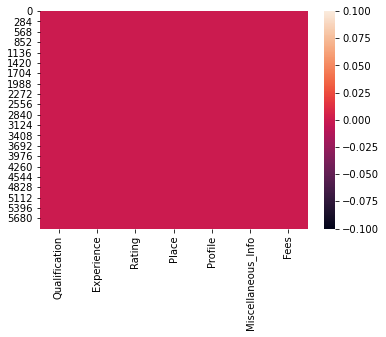

In [415]:
sns.heatmap(Train_data.isnull())

In [416]:
Train_data.shape

(5961, 7)

In [417]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              5961 non-null   object
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [418]:
#Summary Statistics

In [419]:
Train_data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [420]:
#Exploratory Data Analysis

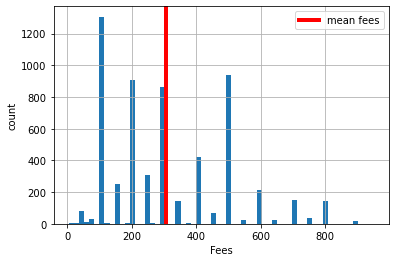

In [421]:
#Checking the mean Fees

fees=Train_data["Fees"].hist(bins=60)
mean_val=np.mean(Train_data['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [422]:
Train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [1]:
#Need to convert Rating into int data type

Train_data['Rating']=Train_data['Rating'].str.slice(stop=-1).astype(int)

NameError: name 'Train_data' is not defined

In [424]:
#Need to convert Experience into integer value

Train_data['years_exp']=Train_data['Experience'].str.slice(stop=2).astype(int)

In [425]:
Train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9
3,"BSc - Zoology, BAMS",12 years experience,100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [426]:
#Need to drop Experience column

Train_data.drop(['Experience'],axis=1, inplace=True)

In [427]:
Train_data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp
0,"BHMS, MD - Homeopathy",100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",100,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9
3,"BSc - Zoology, BAMS",100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [428]:
#Need to separate City and Locality in Place

Train_data['City']=Train_data['Place'].str.split(',').str[1]
Train_data['Locality']=Train_data['Place'].str.split(',').str[0]

In [429]:
Train_data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality
0,"BHMS, MD - Homeopathy",100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",100,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",100,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road
4,BAMS,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai


In [430]:
#Need to drop the Place column

Train_data.drop(['Place'], axis=1, inplace=True)

In [431]:
Train_data.head()

,Qualification,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality
0,"BHMS, MD - Homeopathy",100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road
4,BAMS,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai


In [432]:
#Need to specify the qualification into individual qualification columns



Train_data['Qual_1']=Train_data['Qualification'].str.split(',').str[0]
Train_data['Qual_2']=Train_data['Qualification'].str.split(',').str[1]

In [433]:
Train_data.head()

,Qualification,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,Qual_1,Qual_2
0,"BHMS, MD - Homeopathy",100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy
1,"BAMS, MD - Ayurveda Medicine",98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine
2,"MBBS, MS - Otorhinolaryngology",100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology
3,"BSc - Zoology, BAMS",100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS
4,BAMS,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,BAMS,NaN


In [434]:
#Need to drop Qualification column

Train_data.drop(['Qualification'],axis=1, inplace=True)

In [435]:
Train_data.head()

,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,Qual_1,Qual_2
0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy
1,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine
2,100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology
3,100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS
4,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,BAMS,NaN


In [436]:
#Need to separate Miscellaneous Info

def find_feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0

Train_data['feedack_num'] = Train_data.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [437]:
Train_data.head()

,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num
0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,16
1,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,76
2,100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,0
3,100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,0
4,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,BAMS,NaN,4


In [438]:
list(Train_data.Miscellaneous_Info[Train_data.Miscellaneous_Info.str.contains('INR', na = True)])
Train_data.sample(10)

,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num
4343,100,ENT Specialist,Tonsillectomy Tonsillitis Treatment Tongue Tie...,500,13,Chennai,Adyar,MBBS,Diploma in Otorhinolaryngology (DLO),0
5745,100,Ayurveda,Fistula Treatment Laser treatment for ringworm...,100,7,Bangalore,HSR Layout,BAMS,NaN,0
1454,100,Ayurveda,Acrylic Partial Denture Crowns and Bridges Fix...,200,36,Mumbai,Mira Road,BAMS,NaN,0
5399,100,Dentist,Crowns and Bridges Fixing BPS Dentures Fixing ...,200,8,Chennai,Aminjikarai,MDS,BDS,0
808,98,Dentist,Tooth Extraction Scaling / Polishing Dental Fi...,300,15,Mumbai,Chembur,BDS,MDS - Pedodontics,0
1502,100,Dermatologists,"100% 8 Feedback Sadashivanagar, Bangalore",500,8,Bangalore,Sadashivanagar,MD - Dermatology,Venereology & Leprosy,8
3237,100,Homeopath,"100% 5 Feedback Santacruz West, Mumbai",100,9,Mumbai,Santacruz West,BHMS,Certificate in Sports Nutrition,5
5769,100,General Medicine,managing acute medical conditions Health Check...,350,23,Hyderabad,Begumpet,MBBS,NaN,0
4996,100,Homeopath,"100% 3 Feedback Vengal Rao Nagar, Hyderabad",500,13,Hyderabad,Vengal Rao Nagar,BHMS,MS - Psychology,3
4440,100,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,200,30,Chennai,Tambaram East,MBBS,MD - Obstetrics & Gynaecology,0


In [439]:


def find_fees(data):
    result = re.search(r'INR (\d*)',data)
    if result:
        return int(result.group(1))
    else:
        return 0
    
    

In [440]:
Train_data['fees_val'] = Train_data.Miscellaneous_Info.apply(lambda x: find_fees(x) if 'INR' in str(x) else 0)

In [441]:
Train_data.head()

,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,16,0
1,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,76,0
2,100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,0,0
3,100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,0,0
4,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,BAMS,NaN,4,0


# Rating vs Fees

In [442]:
Train_data['Rating'].value_counts()

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64

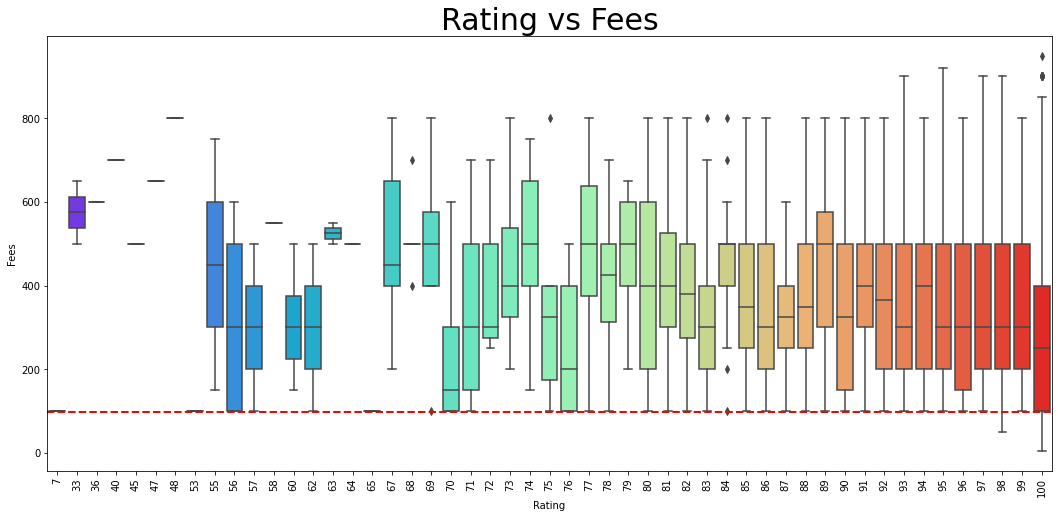

In [443]:
#Rating vs Fees

plt.figure(figsize=(18,8))
mean_fees=np.mean(Train_data['Rating'])
sns.boxplot(y='Fees',x='Rating',data=Train_data, palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Rating vs Fees", fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

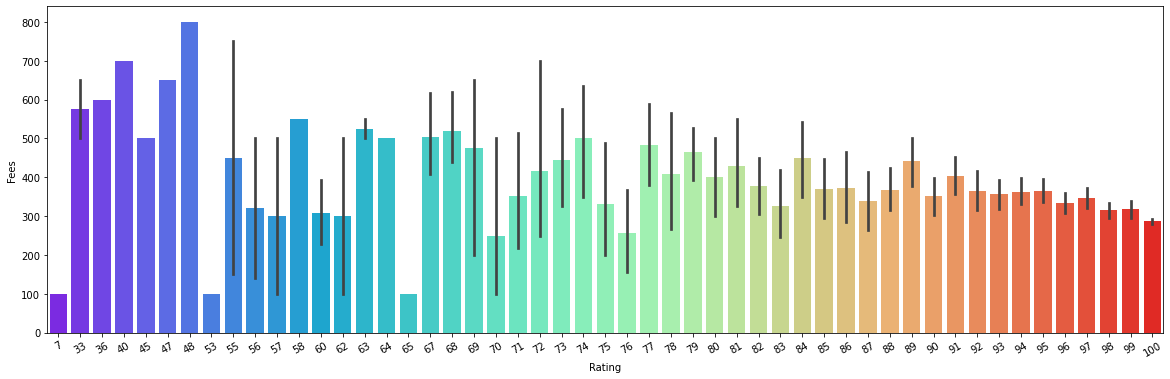

In [444]:
plt.figure(figsize=(20,6))
sns.barplot(x='Rating',y='Fees',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# Experience vs Fees

In [445]:
#Experience vs Fees
Train_data['years_exp'].value_counts()

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: years_exp, Length: 64, dtype: int64

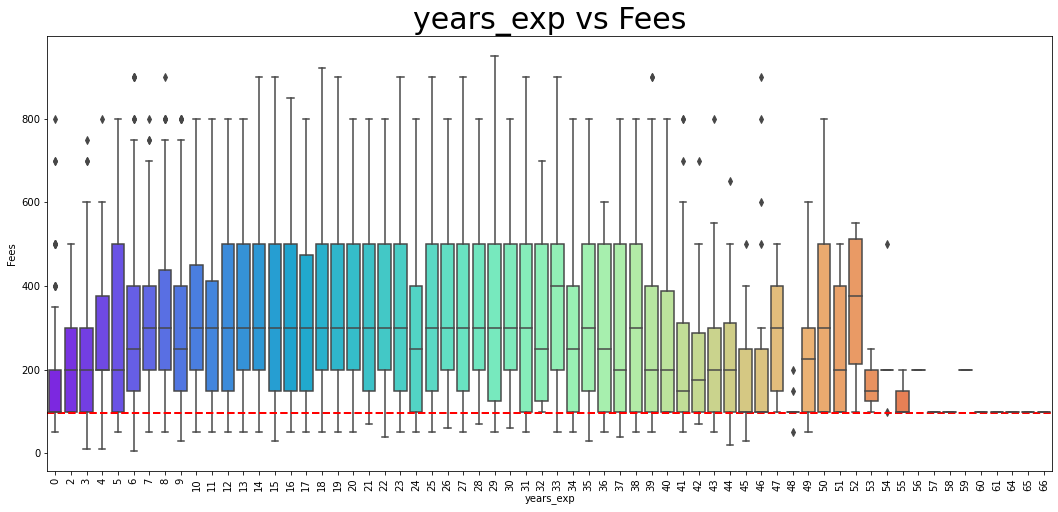

In [446]:
plt.figure(figsize=(18,8))
mean_fees=np.mean(Train_data['Rating'])
sns.boxplot(y='Fees',x='years_exp',data=Train_data, palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("years_exp vs Fees", fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

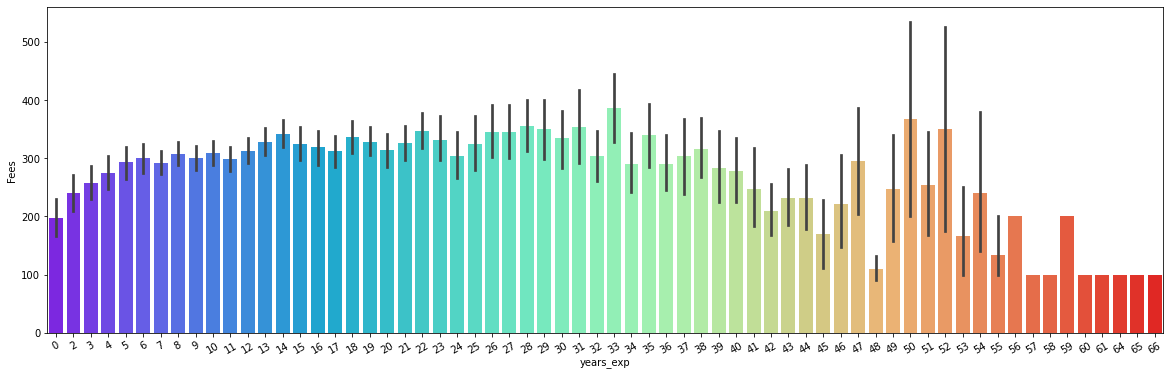

In [447]:
plt.figure(figsize=(20,6))
sns.barplot(x='years_exp',y='Fees',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# Profile vs Fees

In [448]:
Train_data['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

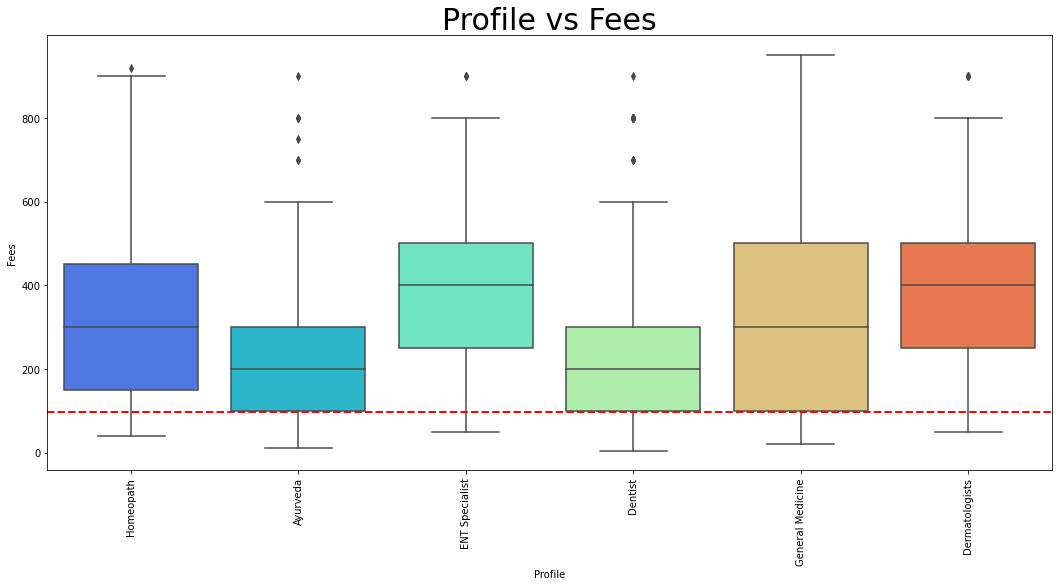

In [449]:
#Profile vs Fees

plt.figure(figsize=(18,8))
mean_fees=np.mean(Train_data['Rating'])
sns.boxplot(y='Fees',x='Profile',data=Train_data, palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Profile vs Fees", fontsize=30)
plt.xticks(rotation='vertical')
plt.show()


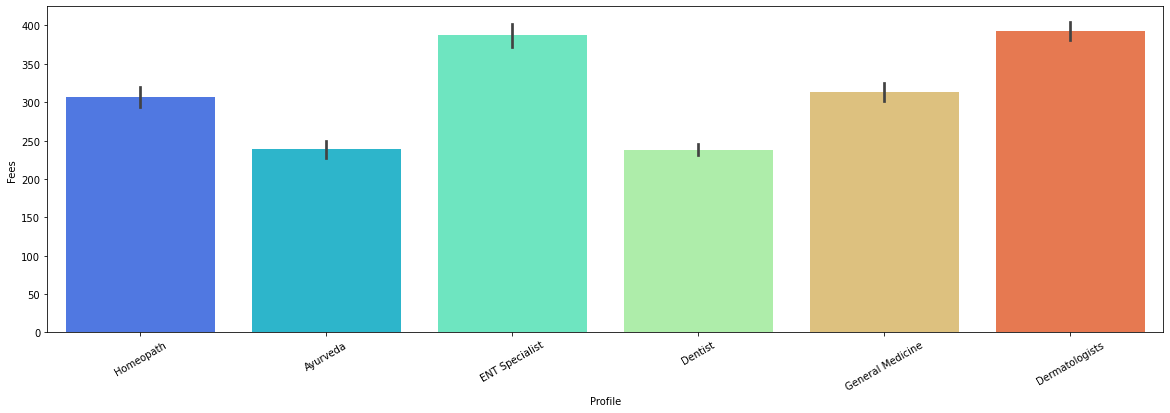

In [450]:
plt.figure(figsize=(20,6))
sns.barplot(x='Profile',y='Fees',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# Qualification vs Fees

In [451]:
Train_data['Qual_1'].value_counts()

MBBS                                                        2448
BDS                                                         1208
BAMS                                                         711
BHMS                                                         706
MD - Dermatology                                              84
                                                            ... 
Fellowship and Diplomate in Implantology from ICOI (USA)       1
D.H.M                                                          1
Diploma in Trichology - Cosmetology                            1
FRGUHS                                                         1
MD - CCM                                                       1
Name: Qual_1, Length: 151, dtype: int64

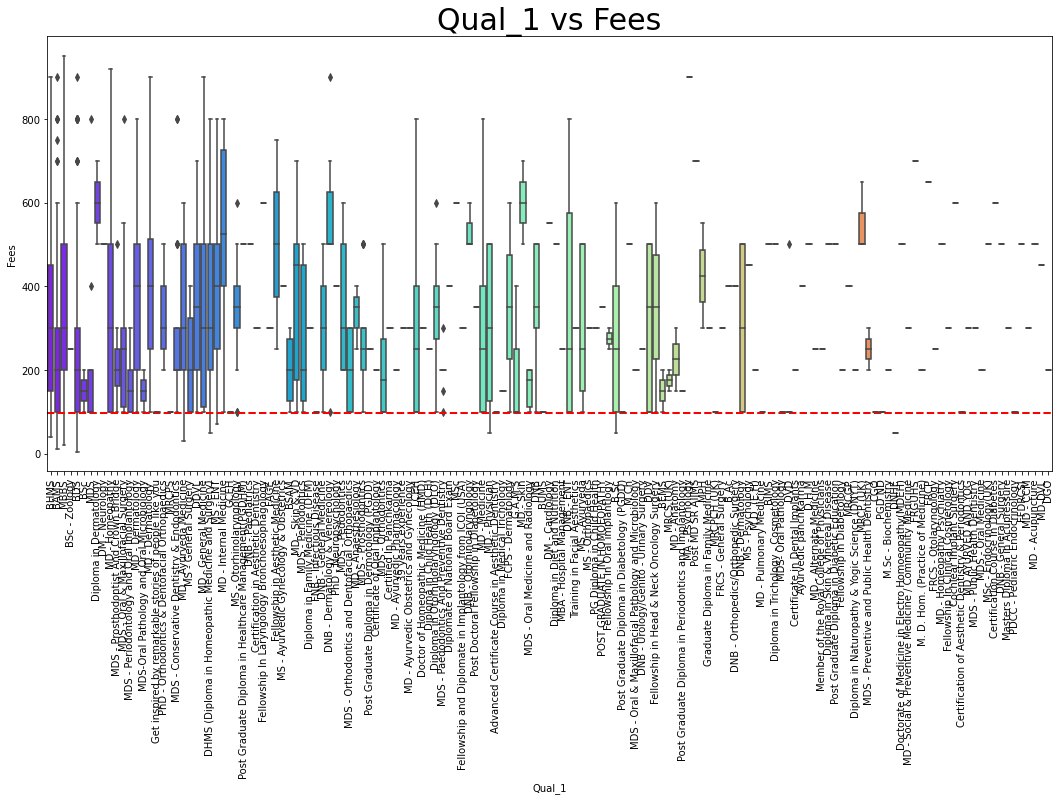

In [452]:
#Qualification vs Fees

plt.figure(figsize=(18,8))
mean_fees=np.mean(Train_data['Rating'])
sns.boxplot(y='Fees',x='Qual_1',data=Train_data, palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Qual_1 vs Fees", fontsize=30)
plt.xticks(rotation='vertical')
plt.show()


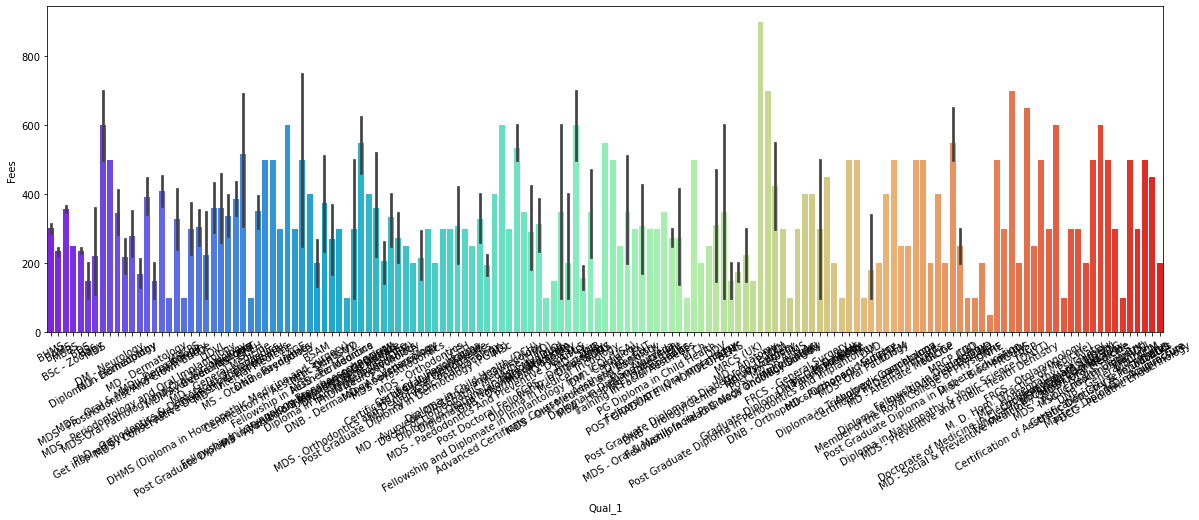

In [453]:
plt.figure(figsize=(20,6))
sns.barplot(x='Qual_1',y='Fees',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# Place vs Fees

In [454]:
Train_data['City'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: City, dtype: int64

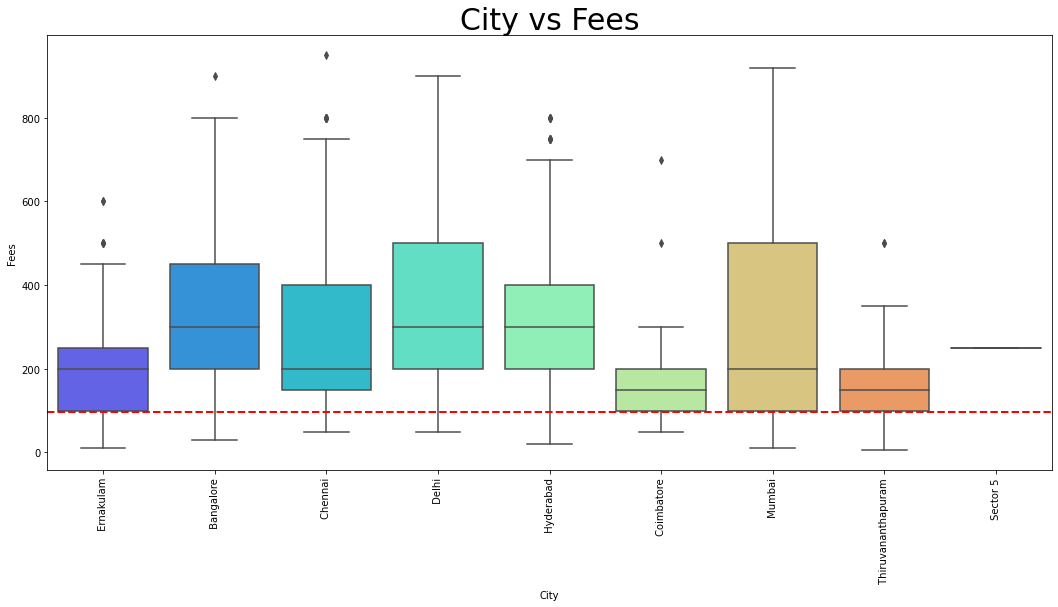

In [455]:
plt.figure(figsize=(18,8))
mean_fees=np.mean(Train_data['Rating'])
sns.boxplot(y='Fees',x='City',data=Train_data, palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("City vs Fees", fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

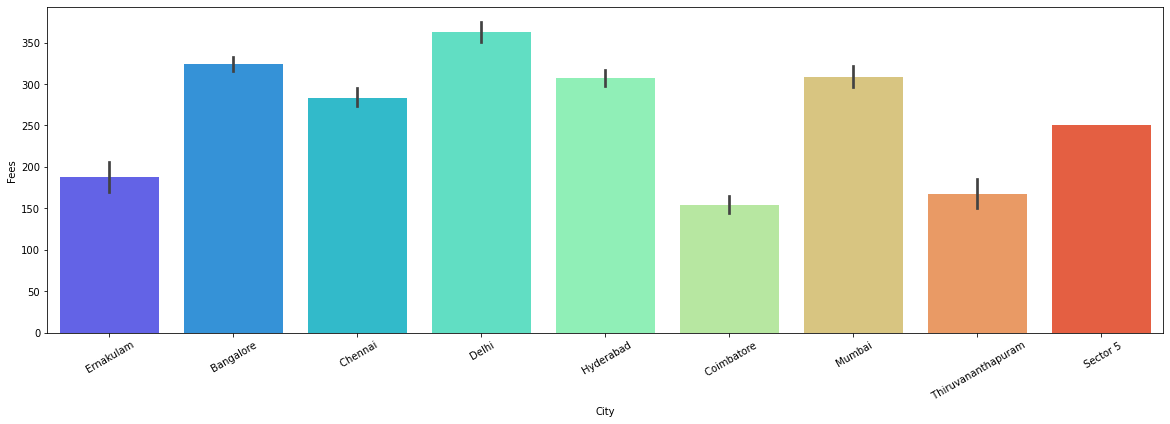

In [456]:
plt.figure(figsize=(20,6))
sns.barplot(x='City',y='Fees',data=Train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

# Handling Categorical Data

In [457]:
Train_data.head()

,Rating,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,16,0
1,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,76,0
2,100,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,0,0
3,100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,0,0
4,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,BAMS,NaN,4,0


In [458]:
Train_data.shape

(5961, 11)

In [459]:
#Dropping Miscellaneous_info column

Train_data.drop(['Miscellaneous_Info'],axis=1 , inplace=True)

In [460]:
Train_data.shape

(5961, 10)

In [461]:
Train_data

,Rating,Profile,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,Homeopath,100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,16,0
1,98,Ayurveda,350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,76,0
2,100,ENT Specialist,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,0,0
3,100,Ayurveda,250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,0,0
4,100,Ayurveda,250,20,Chennai,Keelkattalai,BAMS,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...
5956,98,ENT Specialist,300,19,Bangalore,Basavanagudi,MBBS,MS - ENT,45,0
5957,100,General Medicine,100,33,Chennai,Nungambakkam,MBBS,NaN,0,0
5958,97,General Medicine,600,41,Delhi,Greater Kailash Part 2,MBBS,NaN,11,0
5959,90,General Medicine,100,15,Mumbai,Vileparle West,MBBS,MD - General Medicine,0,0


In [462]:
Train_data.dtypes

Rating          int32
Profile        object
Fees            int64
years_exp       int32
City           object
Locality       object
Qual_1         object
Qual_2         object
feedack_num     int64
fees_val        int64
dtype: object

In [463]:
#Now need to convert Categorical data into Numerical format
    
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Profile','City','Locality','Qual_1','Qual_2']
for val in list1:
    Train_data[val]=le.fit_transform(Train_data[val].astype(str))


In [464]:
Train_data.head()

,Rating,Profile,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,5,100,24,4,296,8,252,16,0
1,98,0,350,12,0,855,5,241,76,0
2,100,3,300,9,0,452,79,334,0,0
3,100,0,250,12,0,68,12,7,0,0
4,100,0,250,20,1,335,5,426,4,0


In [465]:
Train_data.shape

(5961, 10)

# Now all data are in Numeric type , Same steps need to be followed for Test Data

# Test Data

In [466]:
Test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [467]:
Test_data.shape

(1987, 6)

In [468]:
#Preprocessing

Test_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [469]:
Test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

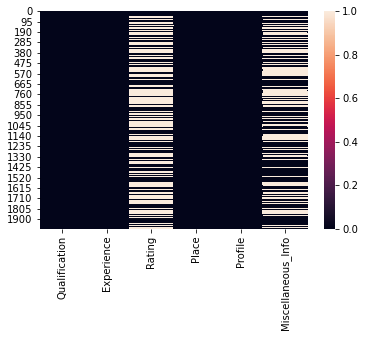

In [470]:
sns.heatmap(Test_data.isnull())

In [471]:
Test_data['Miscellaneous_Info'].unique()

array([nan, '70% 4 Feedback KK Nagar, Chennai',
       'General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry',
       ..., '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment',
       '1 Feedback Pallikaranai, Chennai ₹500'], dtype=object)

In [472]:
Test_data["Miscellaneous_Info"].fillna(Test_data["Miscellaneous_Info"].mode()[0], inplace=True)

In [473]:
Test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info       0
dtype: int64

In [474]:
Test_data["Rating"].fillna(Test_data["Rating"].mode()[0], inplace=True)

In [475]:
Test_data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 6
Profile               0
Miscellaneous_Info    0
dtype: int64

In [476]:
Test_data["Place"].fillna(Test_data["Place"].mode()[0],inplace=True)

In [477]:
Test_data.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

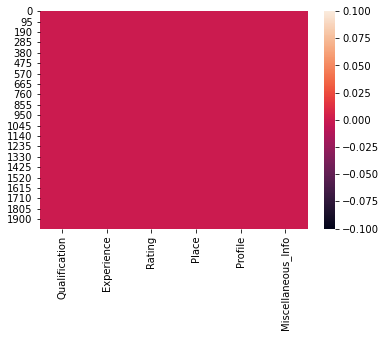

In [478]:
sns.heatmap(Test_data.isnull())

In [479]:
Test_data.shape

(1987, 6)

In [480]:
#EDA

Test_data['Rating']=Test_data['Rating'].str.slice(stop=-1).astype(int)

Test_data['years_exp']=Test_data['Experience'].str.slice(stop=2).astype(int)
Test_data.drop(['Experience'],axis=1, inplace=True)

Test_data['City']=Test_data['Place'].str.split(',').str[1]
Test_data['Locality']=Test_data['Place'].str.split(',').str[0]
Test_data.drop(['Place'], axis=1, inplace=True)


Test_data['Qual_1']=Test_data['Qualification'].str.split(',').str[0]
Test_data['Qual_2']=Test_data['Qualification'].str.split(',').str[1]
Test_data.drop(['Qualification'],axis=1, inplace=True)

def find_feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0

Test_data['feedack_num'] = Test_data.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)


list(Test_data.Miscellaneous_Info[Test_data.Miscellaneous_Info.str.contains('INR', na = True)])
Test_data.sample(10)


def find_fees(data):
    result = re.search(r'INR (\d*)',data)
    if result:
        return int(result.group(1))
    else:
        return 0
    
    
Test_data['fees_val'] = Test_data.Miscellaneous_Info.apply(lambda x: find_fees(x) if 'INR' in str(x) else 0)

Test_data.drop(['Miscellaneous_Info'],axis=1 , inplace=True)

Test_data.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Rating,Profile,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,General Medicine,35,Mumbai,Ghatkopar East,MBBS,NaN,0,0
1,100,ENT Specialist,31,Hyderabad,West Marredpally,MBBS,Diploma in Otorhinolaryngology (DLO),0,0
2,70,Dermatologists,40,Chennai,KK Nagar,MBBS,DDVL,4,0
3,100,Ayurveda,0,Delhi,New Ashok Nagar,BAMS,NaN,0,0
4,100,Dentist,16,Bangalore,Kanakpura Road,BDS,MDS - Conservative Dentistry & Endodontics,0,0


In [481]:
   
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Profile','City','Locality','Qual_1','Qual_2']
for val in list1:
    Test_data[val]=le.fit_transform(Test_data[val].astype(str))


In [482]:
Test_data.head()

,Rating,Profile,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,4,35,6,142,48,243,0,0
1,100,3,31,5,577,48,79,0,0
2,70,2,40,1,212,48,28,4,0
3,100,0,0,3,373,1,243,0,0
4,100,1,16,0,231,2,157,0,0


In [483]:
Test_data.shape

(1987, 9)

In [484]:
Train_data.shape

(5961, 10)

# Summary Statistics

In [485]:
Train_data.describe()

,Rating,Profile,Fees,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.0
mean,97.610636,2.441872,307.944640,17.303976,3.061231,410.120282,47.962087,288.075323,10.339540,0.0
std,5.881539,1.658014,190.920373,11.142798,2.328070,255.174855,39.371696,131.765907,49.607924,0.0
min,7.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,98.000000,1.000000,150.000000,9.000000,1.000000,195.000000,6.000000,227.000000,0.000000,0.0
50%,100.000000,2.000000,300.000000,14.000000,3.000000,404.000000,79.000000,293.000000,0.000000,0.0
75%,100.000000,4.000000,500.000000,23.000000,5.000000,622.000000,79.000000,426.000000,1.000000,0.0
max,100.000000,5.000000,950.000000,66.000000,9.000000,865.000000,150.000000,426.000000,1782.000000,0.0


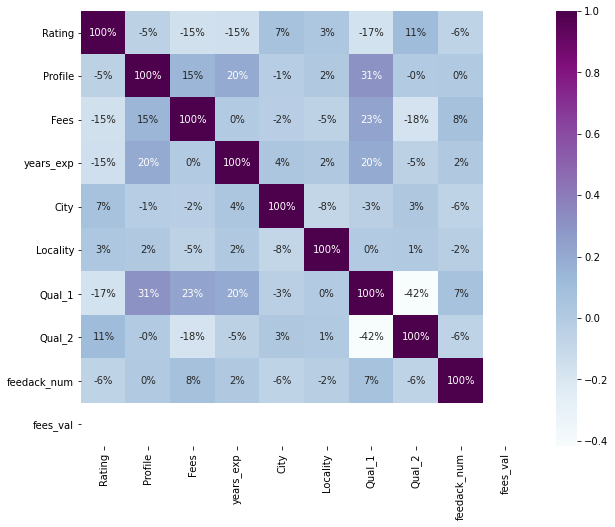

In [486]:
plt.figure(figsize=(10,8))
sns.heatmap(Train_data.corr(), annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with Target Variable')

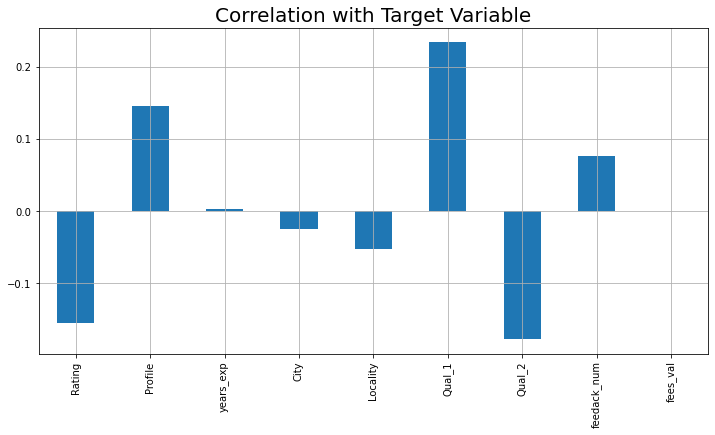

In [487]:
#Correlation with Target Column


plt.figure(figsize=(12,6))
Train_data.drop('Fees',axis=1).corrwith(Train_data['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable", fontsize=20)

In [488]:
#Removing Outliers

from scipy.stats import zscore
z=np.abs(zscore(Train_data))
z

array([[0.40628223, 1.54301587, 1.08926083, ..., 0.2738064 , 0.11411351,
               nan],
       [0.06620663, 1.47289258, 0.22029544, ..., 0.35729479, 1.32369918,
               nan],
       [0.40628223, 0.33665249, 0.04161581, ..., 0.34856156, 0.20844266,
               nan],
       ...,
       [0.10383117, 0.93983418, 1.52985171, ..., 1.04682805, 0.01331471,
               nan],
       [1.29409575, 0.93983418, 1.08926083, ..., 0.29657596, 0.20844266,
               nan],
       [0.40628223, 0.86971089, 0.56543832, ..., 0.02978772, 0.20844266,
               nan]])

In [489]:
threshold=3
print(np.where(z>3))

(array([  18,   55,   67,  105,  110,  140,  178,  183,  209,  275,  293,
        293,  309,  325,  333,  372,  377,  425,  458,  465,  548,  585,
        590,  632,  692,  713,  731,  754,  757,  786,  787,  788,  798,
        810,  815,  820,  837,  851,  901,  911,  918,  968,  979,  987,
        990,  998, 1009, 1016, 1018, 1111, 1170, 1240, 1303, 1314, 1325,
       1327, 1392, 1425, 1433, 1437, 1444, 1475, 1492, 1592, 1594, 1614,
       1631, 1635, 1648, 1717, 1741, 1743, 1747, 1755, 1770, 1777, 1778,
       1796, 1817, 1852, 1860, 1877, 1937, 1981, 2018, 2023, 2025, 2062,
       2089, 2161, 2165, 2202, 2230, 2252, 2262, 2277, 2281, 2309, 2323,
       2391, 2393, 2428, 2444, 2478, 2500, 2505, 2522, 2548, 2585, 2586,
       2590, 2623, 2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2804,
       2829, 2833, 2880, 2899, 2910, 2962, 2991, 3002, 3023, 3042, 3093,
       3120, 3126, 3144, 3180, 3191, 3194, 3222, 3254, 3270, 3295, 3332,
       3333, 3365, 3367, 3463, 3472, 3478, 3493, 3

In [490]:
z[18][0]

3.164511524287465

In [491]:
Train_new=Train_data[(z<3).all(axis=1)]

In [492]:
#Checking the shape

print(Train_data.shape,'\t\t',Train_new.shape)

(5961, 10) 		 (0, 10)


In [493]:
Train_data.shape

(5961, 10)

In [494]:
#Feature Selection

Train_data.columns

Index(['Rating', 'Profile', 'Fees', 'years_exp', 'City', 'Locality', 'Qual_1',
       'Qual_2', 'feedack_num', 'fees_val'],
      dtype='object')

In [495]:
#Splitting the data into input and output Variable

x=Train_data.drop(columns=['Fees'],axis=1)
x.head()

,Rating,Profile,years_exp,City,Locality,Qual_1,Qual_2,feedack_num,fees_val
0,100,5,24,4,296,8,252,16,0
1,98,0,12,0,855,5,241,76,0
2,100,3,9,0,452,79,334,0,0
3,100,0,12,0,68,12,7,0,0
4,100,0,20,1,335,5,426,4,0


In [496]:
x.shape

(5961, 9)

In [497]:
y=Train_data['Fees']
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [498]:
y.shape

(5961,)

In [499]:
#Scaling ininput variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [500]:
#Splitting the data into training and Testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=.20,random_state=42)


In [501]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(4768, 9) 		 (1193, 9)


In [502]:
print(y_train.shape,'\t\t',y_test.shape)

(4768,) 		 (1193,)


In [503]:
#Importing the Model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV ,cross_val_score

In [504]:
#All algorithm by using for Loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of ',m , 'is:', score)
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2_score:",r2_score(y_test,predm))
    print('*********************************************')
    print('\n')

Score of  LinearRegression() is: 0.09173206550227553
MAE: 142.69045738022692
MSE: 31016.70764561698
RMSE: 176.11560875066408
R2_score: 0.09957055034146
*********************************************


Score of  SVR() is: 0.0552880682382374
MAE: 141.2720308608606
MSE: 32275.7285975807
RMSE: 179.65447001836804
R2_score: 0.06302058650139208
*********************************************


Score of  DecisionTreeRegressor() is: 0.9972792114904772
MAE: 168.13160100586757
MSE: 56636.00717146316
RMSE: 237.98320775101584
R2_score: -0.6441696311202172
*********************************************


Score of  KNeighborsRegressor() is: 0.34306968787562975
MAE: 137.1864207879296
MSE: 31354.943738474438
RMSE: 177.07327223066287
R2_score: 0.08975139924308972
*********************************************


Score of  Lasso() is: 0.09153530768797258
MAE: 142.9567470473015
MSE: 31046.777276523517
RMSE: 176.20095708174662
R2_score: 0.09869761497004792
*********************************************


Score of

In [505]:
#Cross validate all algorithms by using for Loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    print('********************************************')
    print('\n')

Model: LinearRegression()
Score: [0.08738894 0.08807145 0.09552909 0.07887067 0.08617337 0.08885734
 0.1000119  0.06869166 0.11255148 0.0795268 ]
Mean Score: 0.08856726994799535
Standard deviation: 0.011545267837292367
********************************************


Model: SVR()
Score: [0.07549266 0.07891861 0.07254557 0.03721765 0.06480791 0.07112057
 0.05350284 0.02694954 0.04877424 0.09474373]
Mean Score: 0.06240733216676183
Standard deviation: 0.019572644397952744
********************************************


Model: DecisionTreeRegressor()
Score: [-0.58108174 -0.44541321 -0.62222207 -0.48836744 -0.55955846 -0.55762805
 -0.38573351 -0.55253696 -0.49757945 -0.58747969]
Mean Score: -0.5277600563931795
Standard deviation: 0.06874956689568584
********************************************


Model: KNeighborsRegressor()
Score: [-0.00041121  0.01080879  0.0763028  -0.03680715  0.0289364   0.0561474
  0.10880508 -0.00656943  0.02929645  0.00763662]
Mean Score: 0.027414574219914622
Standard d

# Random Forest Regressor gives best score and r2score so chosen as Final Model

# GridSearchCV to find the best parameters

In [506]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()


clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 400}


In [507]:
#Using RandomForestRegresoor with its best parameters

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400, min_samples_split=15, min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("R2_score:",r2_score(y_test,y_pred))
print('\n')

Score 0.6008163026152907


MAE: 127.0277104079467
MSE: 27011.60318227923
RMSE: 164.35207081834784


R2_score: 0.21584059579413362




# Now our R2_score increases

#Before Hyperparameter tuning ---r2_score is :0.192
#After Hyperparameter tuning  ---r2_score is :0.210
        

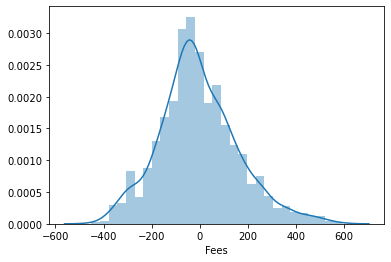

In [508]:
#plotting the distribution plot and we find the Gaussian plot

sns.distplot(y_test-y_pred)

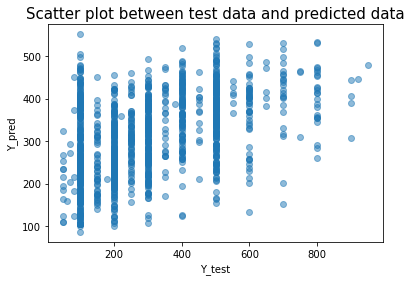

In [509]:
#Scatter plot between test data  and prediction

plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data", fontsize=15)
plt.show()

In [2]:
import pickle
from sklearn.externals import joblib
joblib.dump(rf,'Doctor_fees_prediction_rf.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\hp\anaconda3\lib\site-packages\sklearn\externals\__init__.py)